<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/HW_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
library(lubridate)
library(tidyverse)
library(survival)
install.packages('gtsummary')
library(gtsummary)
library(tidycmprsk)
devtools::install_github("zabore/condsurv") # author package
library(condsurv)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'condsurv' from a github remote, the SHA1 (e6185902) has not changed since last install.
  Use `force = TRUE` to force installation



In [79]:
install.packages('tidycmprsk')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
install.packages('condsurv')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘condsurv’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘condSURV’ ?”


In [81]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [82]:
family_history <- read_tsv('/content/sample_data/family_history.tsv')

Rows: 46 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (11): case_id, case_submitter_id, project_id, relationship_age_at_diagno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [83]:
head(family_history)

case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_deceased,relative_smoker,relative_with_cancer_history,relatives_with_cancer_history_count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,unknown,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--
13f667da-a66b-4622-9e6a-b3e861e96961,HCM-BROD-0232-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,unknown,'--
17f4b889-d7b9-42d1-adb8-cbad65a56547,HCM-CSHL-0176-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--
18909e2d-a178-49b3-9a70-998f944af8a3,HCM-BROD-0009-C25,HCMI-CMDC,'--,'--,'--,"First Degree Relative, NOS",'--,'--,no,'--


In [84]:
family_history[family_history == "'--"] <- NA

In [85]:
sum(is.na(family_history))

[1] 265

In [86]:
family_history

case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_deceased,relative_smoker,relative_with_cancer_history,relatives_with_cancer_history_count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,unknown,NA
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,no,NA
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,no,NA
13f667da-a66b-4622-9e6a-b3e861e96961,HCM-BROD-0232-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,unknown,NA
17f4b889-d7b9-42d1-adb8-cbad65a56547,HCM-CSHL-0176-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,no,NA
18909e2d-a178-49b3-9a70-998f944af8a3,HCM-BROD-0009-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,no,NA
19f1d344-4c14-4733-abbd-c2db6737e210,HCM-CSHL-0081-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,no,NA
1ae8657f-477f-4e1a-aef2-dd1c1ab5f26a,HCM-BROD-0231-C25,HCMI-CMDC,NA,NA,Pancreas Cancer,"First Degree Relative, NOS",NA,NA,yes,NA
2127626f-247f-4c47-b096-a876f08db1a0,HCM-SANG-0315-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,unknown,NA


In [87]:
family_history <- family_history %>%
  mutate(relative_with_cancer_history = recode(relative_with_cancer_history, 'yes' = 1, 'no' = 0, 'unknown' = 2))

In [88]:
head(family_history)

case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_deceased,relative_smoker,relative_with_cancer_history,relatives_with_cancer_history_count
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,2,NA
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,0,NA
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,0,NA
13f667da-a66b-4622-9e6a-b3e861e96961,HCM-BROD-0232-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,2,NA
17f4b889-d7b9-42d1-adb8-cbad65a56547,HCM-CSHL-0176-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,0,NA
18909e2d-a178-49b3-9a70-998f944af8a3,HCM-BROD-0009-C25,HCMI-CMDC,NA,NA,NA,"First Degree Relative, NOS",NA,NA,0,NA


In [89]:
family_history <- family_history %>%
  select(-relationship_age_at_diagnosis,-relationship_gender,-relationship_primary_diagnosis,-relative_deceased	,-relative_smoker,-relatives_with_cancer_history_count)

In [90]:
family_history$relative_with_cancer_history <- as.factor(family_history$relative_with_cancer_history)

In [91]:
head(family_history)

case_id,case_submitter_id,project_id,relationship_type,relative_with_cancer_history
<chr>,<chr>,<chr>,<chr>,<fct>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,"First Degree Relative, NOS",2
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,"First Degree Relative, NOS",0
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,"First Degree Relative, NOS",0
13f667da-a66b-4622-9e6a-b3e861e96961,HCM-BROD-0232-C25,HCMI-CMDC,"First Degree Relative, NOS",2
17f4b889-d7b9-42d1-adb8-cbad65a56547,HCM-CSHL-0176-C25,HCMI-CMDC,"First Degree Relative, NOS",0
18909e2d-a178-49b3-9a70-998f944af8a3,HCM-BROD-0009-C25,HCMI-CMDC,"First Degree Relative, NOS",0


In [92]:
family_history

case_id,case_submitter_id,project_id,relationship_type,relative_with_cancer_history
<chr>,<chr>,<chr>,<chr>,<fct>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,"First Degree Relative, NOS",2
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,"First Degree Relative, NOS",0
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,"First Degree Relative, NOS",0
13f667da-a66b-4622-9e6a-b3e861e96961,HCM-BROD-0232-C25,HCMI-CMDC,"First Degree Relative, NOS",2
17f4b889-d7b9-42d1-adb8-cbad65a56547,HCM-CSHL-0176-C25,HCMI-CMDC,"First Degree Relative, NOS",0
18909e2d-a178-49b3-9a70-998f944af8a3,HCM-BROD-0009-C25,HCMI-CMDC,"First Degree Relative, NOS",0
19f1d344-4c14-4733-abbd-c2db6737e210,HCM-CSHL-0081-C25,HCMI-CMDC,"First Degree Relative, NOS",0
1ae8657f-477f-4e1a-aef2-dd1c1ab5f26a,HCM-BROD-0231-C25,HCMI-CMDC,"First Degree Relative, NOS",1
2127626f-247f-4c47-b096-a876f08db1a0,HCM-SANG-0315-C25,HCMI-CMDC,"First Degree Relative, NOS",2


В колонке 'relative_with_cancer_history' 0-no,1-yes,2-unknown

In [358]:
clinical <- read_tsv('/content/sample_data/clinical.tsv')

New names:
• `residual_disease` -> `residual_disease...118`
• `residual_disease` -> `residual_disease...189`
Rows: 1745 Columns: 210
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (210): case_id, case_submitter_id, project_id, age_at_index, age_is_obfu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [359]:
clinical

case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_birth,country_of_residence_at_enrollment,days_to_birth,⋯,treatment_dose_units,treatment_duration,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_outcome_duration,treatment_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,'--,'--,'--,'--,'--,-19718,⋯,'--,'--,'--,'--,'--,'--,no,'--,'--,"Pharmaceutical Therapy, NOS"
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,53,'--,'--,'--,'--,'--,-19718,⋯,'--,'--,'--,'--,'--,'--,no,'--,'--,"Radiation Therapy, NOS"
01793010-6599-4c35-91ae-534d03577343,AD7106,FM-AD,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [360]:
clinical <- clinical %>%
  select(-cause_of_death_source,
  -country_of_birth	,-country_of_residence_at_enrollment,
  -treatment_dose_units,-treatment_duration,-treatment_effect,
  -treatment_effect_indicator,-treatment_frequency,-treatment_outcome,
  -treatment_outcome_duration)

In [361]:
clinical <- clinical %>%
  select(-marital_status,-occupation_duration_years,-therapeutic_target_level,-timepoint_category,
  -treatment_anatomic_site,-treatment_arm,-treatment_dose,-treatment_dose_max)

In [362]:
clinical <- clinical %>%
  select(-age_at_index,-age_is_obfuscated,-ethnicity,-premature_at_birth)

In [363]:
clinical  <- clinical %>%
  select(-treatment_anatomic_sites,-therapeutic_levels_achieved,-therapeutic_level_achieved,
  -education_level,-weeks_gestation_at_birth,-regimen_or_line_of_therapy,-route_of_administration	,
  -therapeutic_level_achieved,-treatment_anatomic_sites,-therapeutic_levels_achieved)

In [364]:
clinical <- clinical %>%
  select(-prescribed_dose,-protocol_identifier,-radiosensitizing_agent,-reason_treatment_ended,
  -reason_treatment_not_given)

In [365]:
clinical <- clinical %>%
  select(-embolic_agent,-lesions_treated_number,
  -number_of_fractions,-number_of_cycles)

In [366]:
clinical <- clinical %>%
  select(-course_number,-drug_category)

In [367]:
clinical <- clinical %>%
  select(-chemo_concurrent_to_radiation,-clinical_trial_indicator,
  -days_to_treatment_end)

In [368]:
clinical <- clinical %>%
  select(-vascular_invasion_present,-vascular_invasion_type)

In [369]:
clinical[clinical == "'--"] <- NA

In [370]:
clinical <- clinical %>%
  mutate(gender = recode(gender, 'male' = 1, 'female' = 0))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gender = recode(gender, male = 1, female = 0)`.
Caused by warning:
! Unreplaced values treated as NA as `.x` is not compatible.
Please specify replacements exhaustively or supply `.default`.”


In [371]:
clinical <- clinical %>%
  select(-transglottic_extension,-tumor_largest_dimension_diameter,-tumor_stage)

In [373]:
clinical <- clinical %>%
  mutate(vital_status = case_when(
  vital_status == "Dead" ~ 1,
  vital_status == "Not Reported" ~ 0,
  vital_status == "Alive" ~ 0,
  vital_status == "Unknown" ~ 0,
  TRUE ~ as.numeric(vital_status)
  ))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `vital_status = case_when(...)`.
Caused by warning:
! NAs introduced by coercion”


In [375]:
clinical <- clinical %>%
  mutate(treatment_intent_type = ifelse(is.na(treatment_intent_type),"None",treatment_intent_type))
clinical <- clinical %>%
  mutate(treatment_or_therapy = ifelse(is.na(treatment_or_therapy),"unknown",treatment_or_therapy))
clinical <- clinical %>%
  mutate(treatment_type = ifelse(is.na(treatment_type),"None",treatment_type))

In [376]:
clinical

case_id,case_submitter_id,project_id,cause_of_death,days_to_birth,days_to_death,gender,race,vital_status,year_of_birth,⋯,perineural_invasion_present,peripancreatic_lymph_nodes_positive,peripancreatic_lymph_nodes_tested,days_to_treatment_start,initial_disease_status,residual_disease...189,therapeutic_agents,treatment_intent_type,treatment_or_therapy,treatment_type
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
00061f34-c891-4f9c-b8d6-3ca68b98c875,AD1348,FM-AD,NA,NA,NA,0,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None
0035b612-8955-4da5-a35d-bced5b32cbec,AD258,FM-AD,NA,NA,NA,1,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None
008147fd-3235-4bab-b816-7589590959d1,AD10836,FM-AD,NA,NA,NA,0,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None
00f67c2e-b77f-4082-907c-1dd4ea418f14,AD12672,FM-AD,NA,NA,NA,0,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None
01462f16-c767-40ee-8c81-d3927d308aa8,AD8272,FM-AD,NA,NA,NA,0,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None
014cd6ee-733c-4894-997e-cfb534a587c1,AD15735,FM-AD,NA,NA,NA,0,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,NA,-19718,486,0,white,1,1955,⋯,NA,NA,NA,NA,NA,NA,NA,None,no,"Pharmaceutical Therapy, NOS"
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,NA,-19718,486,0,white,1,1955,⋯,NA,NA,NA,NA,NA,NA,NA,None,no,"Radiation Therapy, NOS"
01793010-6599-4c35-91ae-534d03577343,AD7106,FM-AD,NA,NA,NA,1,not reported,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,None,unknown,None


In [345]:
pathology_detail <- read_tsv("/content/sample_data/pathology_detail.tsv")

Rows: 126 Columns: 77
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (77): case_id, case_submitter_id, project_id, diagnosis_id, diagnosis_su...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [346]:
head(pathology_detail)

case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,⋯,tumor_infiltrating_macrophages,tumor_largest_dimension_diameter,tumor_length_measurement,tumor_level_prostate,tumor_shape,tumor_thickness,tumor_width_measurement,vascular_invasion_present,vascular_invasion_type,zone_of_origin_prostate
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,70da7d37-590b-41a5-97c7-17238c0c8652,HCM-CSHL-0084-C25_diagnosis,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,00184ed8-780a-4acf-b5f1-b1fcd6b08dcf,HCM-BROD-0124-C25_diagnosis,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
12126fde-c904-4b3b-81b4-083824d7a0d4,C3N-02589,CPTAC-3,48df91ac-8bd7-4556-9433-c104d4a0081f,C3N-02589-DIAG,'--,'--,'--,'--,'--,⋯,'--,4.0,'--,'--,'--,'--,'--,'--,'--,'--
1309999e-853f-4f99-84a2-1095e674f5ae,C3L-03632,CPTAC-3,9d5db58c-7d40-45b8-bb3a-8e9faf5d7467,C3L-03632-DIAG,'--,'--,'--,'--,'--,⋯,'--,12.0,'--,'--,'--,'--,'--,'--,'--,'--
1632bbd5-d5ba-42e4-aee4-c8637991a892,C3L-01051,CPTAC-3,6a9d41fa-bf96-4225-b2c3-bafba35defdc,C3L-01051-DIAG,'--,'--,'--,'--,'--,⋯,'--,3.5,'--,'--,'--,'--,'--,'--,'--,'--
16fbe029-3b4f-45c9-849e-20ad7d7b8f1f,C3L-00881,CPTAC-3,24b7d304-a79d-488e-a61a-bf04c93ded2d,C3L-00881-DIAG,'--,'--,'--,'--,'--,⋯,'--,2.4,'--,'--,'--,'--,'--,'--,'--,'--


In [349]:
pathology_detail_new <- pathology_detail %>%
  select(case_id,tumor_largest_dimension_diameter)

In [350]:
pathology_detail_new[pathology_detail_new == "'--"] <- NA

In [352]:
pathology_detail_new

case_id,tumor_largest_dimension_diameter
<chr>,<chr>
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,NA
03bfeb7c-cecf-4691-8263-33cdfe391ea9,NA
12126fde-c904-4b3b-81b4-083824d7a0d4,4.0
1309999e-853f-4f99-84a2-1095e674f5ae,12.0
1632bbd5-d5ba-42e4-aee4-c8637991a892,3.5
16fbe029-3b4f-45c9-849e-20ad7d7b8f1f,2.4
17f4b889-d7b9-42d1-adb8-cbad65a56547,NA
188f9191-e4e2-4b00-80cf-c1e1424580a7,6.0
18909e2d-a178-49b3-9a70-998f944af8a3,NA


In [353]:
pathology_detail_new <- pathology_detail_new %>%
  mutate(tumor_largest_dimension_diameter = ifelse(is.na(tumor_largest_dimension_diameter),0,tumor_largest_dimension_diameter))

In [354]:
pathology_detail_new$tumor_largest_dimension_diameter <- as.numeric(pathology_detail_new$tumor_largest_dimension_diameter)

In [377]:
pathology_detail_new

case_id,tumor_largest_dimension_diameter
<chr>,<dbl>
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,0.0
03bfeb7c-cecf-4691-8263-33cdfe391ea9,0.0
12126fde-c904-4b3b-81b4-083824d7a0d4,4.0
1309999e-853f-4f99-84a2-1095e674f5ae,12.0
1632bbd5-d5ba-42e4-aee4-c8637991a892,3.5
16fbe029-3b4f-45c9-849e-20ad7d7b8f1f,2.4
17f4b889-d7b9-42d1-adb8-cbad65a56547,0.0
188f9191-e4e2-4b00-80cf-c1e1424580a7,6.0
18909e2d-a178-49b3-9a70-998f944af8a3,0.0


In [329]:
exposure <- read_tsv("/content/sample_data/exposure.tsv")

Rows: 401 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (44): case_id, case_submitter_id, project_id, age_at_last_exposure, age_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [330]:
exposure_new <- exposure %>%
  select(case_id,alcohol_history,alcohol_intensity,years_smoked)

In [331]:
exposure_new$alcohol_history[exposure_new$alcohol_history == "'--"] <- NA
exposure_new$alcohol_history[exposure_new$alcohol_history == "Not Reported"] <- NA

In [332]:
exposure_new <- exposure_new %>%
  mutate(alcohol_history = case_when(
  alcohol_history == 'Yes' ~ 1,
  alcohol_history == 'No' ~ 0,
  is.na(alcohol_history) ~ 2,
  TRUE ~ as.numeric(alcohol_history)))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `alcohol_history = case_when(...)`.
Caused by warning:
! NAs introduced by coercion”


In [336]:
exposure_new$alcohol_history <- as.factor(exposure_new$alcohol_history)

In [334]:
exposure_new <- exposure_new %>%
  mutate(alcohol_intensity = case_when(
  alcohol_intensity == "'--" ~ 2,
  alcohol_intensity == "Occasional Drinker" ~ 1,
  alcohol_intensity == "Lifelong Non-Drinker" ~ 0,
  alcohol_intensity == "Non-Drinker" ~ 0,
  alcohol_intensity == "Unknown" ~ 2,
  TRUE ~ as.numeric(alcohol_intensity)
  ))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `alcohol_intensity = case_when(...)`.
Caused by warning:
! NAs introduced by coercion”


In [337]:
exposure_new$alcohol_intensity <- as.factor(exposure_new$alcohol_intensity)

In [340]:
exposure_new <- exposure_new %>%
  mutate(years_smoked = case_when(
  years_smoked == "'--" ~ 0,
  TRUE ~ as.numeric(years_smoked)
  ))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `years_smoked = case_when(years_smoked == "'--" ~ 0, TRUE ~
  as.numeric(years_smoked))`.
Caused by warning:
! NAs introduced by coercion”


In [341]:
exposure_new

case_id,alcohol_history,alcohol_intensity,years_smoked
<chr>,<fct>,<fct>,<dbl>
01775b06-5836-469c-8537-120cb8cc94e9,1,2,0
01b7ac35-49e3-48db-a081-2971b807445f,1,1,0
0251b915-6bf6-43a3-b3a3-aadbac0be13f,2,2,0
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,2,0,0
02dbd5fa-e31f-4486-8df8-5b851f2e92bd,2,2,0
02ef2e1a-5afe-4c00-a3ea-7f4a153f1da4,0,2,0
03bfeb7c-cecf-4691-8263-33cdfe391ea9,2,1,0
0576d76b-d37c-4df6-9cdd-6397a900c282,1,1,3
05d2adb3-5c6d-4edc-ba4c-bdbf628f4eee,0,2,0


In [118]:
follow_up <- read_tsv("/content/sample_data/follow_up.tsv")

New names:
• `timepoint_category` -> `timepoint_category...78`
• `timepoint_category` -> `timepoint_category...133`
Rows: 306 Columns: 137
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (137): case_id, case_submitter_id, project_id, adverse_event, adverse_ev...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [119]:
follow_up

case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,⋯,test_analyte_type,test_result,test_units,test_value,test_value_range,timepoint_category...133,transcript,variant_origin,variant_type,zygosity
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
0251b915-6bf6-43a3-b3a3-aadbac0be13f,HCM-BROD-0204-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Positive,'--,'--,'--,'--,'--,'--,Substitution,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Positive,'--,'--,'--,'--,'--,'--,Substitution,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Test Value Reported,'--,1170.0,'--,'--,'--,'--,'--,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Positive,'--,'--,'--,'--,'--,'--,Substitution,'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,Negative,'--,'--,'--,'--,'--,'--,"Mutation, NOS",'--
0286c31b-a704-4d7d-99e3-0bc4e8975b8b,HCM-CSHL-0084-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,'--,'--,'--,'--,'--,'--,'--,⋯,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [378]:
merged_data <- clinical %>%
  full_join(exposure_new, by = "case_id") %>%
  full_join(pathology_detail_new, by = "case_id") %>%
  full_join(family_history,by = "case_id")

Warning message in full_join(., pathology_detail_new, by = "case_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 202 of `x` matches multiple rows in `y`.
ℹ Row 1 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [394]:
data_cleaned <- merged_data %>%
  filter(!is.na(days_to_death))

In [395]:
data_cleaned

case_id,case_submitter_id.x,project_id.x,cause_of_death,days_to_birth,days_to_death,gender,race,vital_status,year_of_birth,⋯,treatment_or_therapy,treatment_type,alcohol_history,alcohol_intensity,years_smoked,tumor_largest_dimension_diameter,case_submitter_id.y,project_id.y,relationship_type,relative_with_cancer_history
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,⋯,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,NA,-19718,486,0,white,1,1955,⋯,no,"Pharmaceutical Therapy, NOS",1,2,0,NA,NA,NA,NA,NA
01775b06-5836-469c-8537-120cb8cc94e9,TCGA-IB-7897,TCGA-PAAD,NA,-19718,486,0,white,1,1955,⋯,no,"Radiation Therapy, NOS",1,2,0,NA,NA,NA,NA,NA
01b7ac35-49e3-48db-a081-2971b807445f,C3N-02696,CPTAC-3,Cancer Related,-23828,697,1,white,1,1952,⋯,unknown,None,1,1,0,NA,NA,NA,NA,NA
02dbd5fa-e31f-4486-8df8-5b851f2e92bd,TCGA-HZ-8315,TCGA-PAAD,NA,-19839,299,0,white,1,1958,⋯,yes,"Pharmaceutical Therapy, NOS",2,2,0,NA,NA,NA,NA,NA
02dbd5fa-e31f-4486-8df8-5b851f2e92bd,TCGA-HZ-8315,TCGA-PAAD,NA,-19839,299,0,white,1,1958,⋯,not reported,"Radiation Therapy, NOS",2,2,0,NA,NA,NA,NA,NA
02ef2e1a-5afe-4c00-a3ea-7f4a153f1da4,TCGA-HZ-8636,TCGA-PAAD,NA,-21501,545,0,white,1,1954,⋯,yes,"Pharmaceutical Therapy, NOS",0,2,0,NA,NA,NA,NA,NA
02ef2e1a-5afe-4c00-a3ea-7f4a153f1da4,TCGA-HZ-8636,TCGA-PAAD,NA,-21501,545,0,white,1,1954,⋯,not reported,"Radiation Therapy, NOS",0,2,0,NA,NA,NA,NA,NA
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,Cancer Related,-22096,481,1,white,1,1955,⋯,no,Immunotherapy (Including Vaccines),2,1,0,0,HCM-BROD-0124-C25,HCMI-CMDC,"First Degree Relative, NOS",0
03bfeb7c-cecf-4691-8263-33cdfe391ea9,HCM-BROD-0124-C25,HCMI-CMDC,Cancer Related,-22096,481,1,white,1,1955,⋯,yes,Chemotherapy,2,1,0,0,HCM-BROD-0124-C25,HCMI-CMDC,"First Degree Relative, NOS",0


In [396]:
data_cleaned$days_to_death <- as.numeric(data_cleaned$days_to_death)
data_cleaned$vital_status <- as.numeric(data_cleaned$vital_status)

In [389]:
install.packages("survminer")
library(survminer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘xtable’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




In [397]:
Surv(data_cleaned$days_to_death,data_cleaned$vital_status)

  [1]  486  486  697  299  299  545  545  481  481  481  481  481  481  481  481
 [16]  481  481  481 1332 1332  117  117  403  695  695  246  277  277  815  212
 [31]  398 1481  386  386  386  386  386  386  386  485  485  487  661  661  335
 [46]  702  702  702  702  702  702  702  702  702  702  702  702  702  702  702
 [61]  532  532  394  394  427  427  427  427  288  230  230  250  250  250  250
 [76]  250  250  250  250  250  250  250  250  279  227  227  227  227  227  227
 [91]  227  227  227  227  227  227  227  227  227  227  227  227  227  227  227
[106]  227  227  227  227  227  227  227  227  227  227  227  227  227  227  227
[121]  292  292  764  108  553   95   95  236  236  233  233   20 1142  120  120
[136]  269  293  293  293  293  293  293  293  293  293  293  293  293  293  293
[151]  293  293  293  293  652  652  276  308  308  594  375  375  139  518  518
[166]  991    8  593  593  460  460  313  313  481  481  913  155  155  603  603
[181]  603  257  257  257  2

In [400]:
surv_object <- survfit(Surv(days_to_death, vital_status) ~ 1,data = data_cleaned)

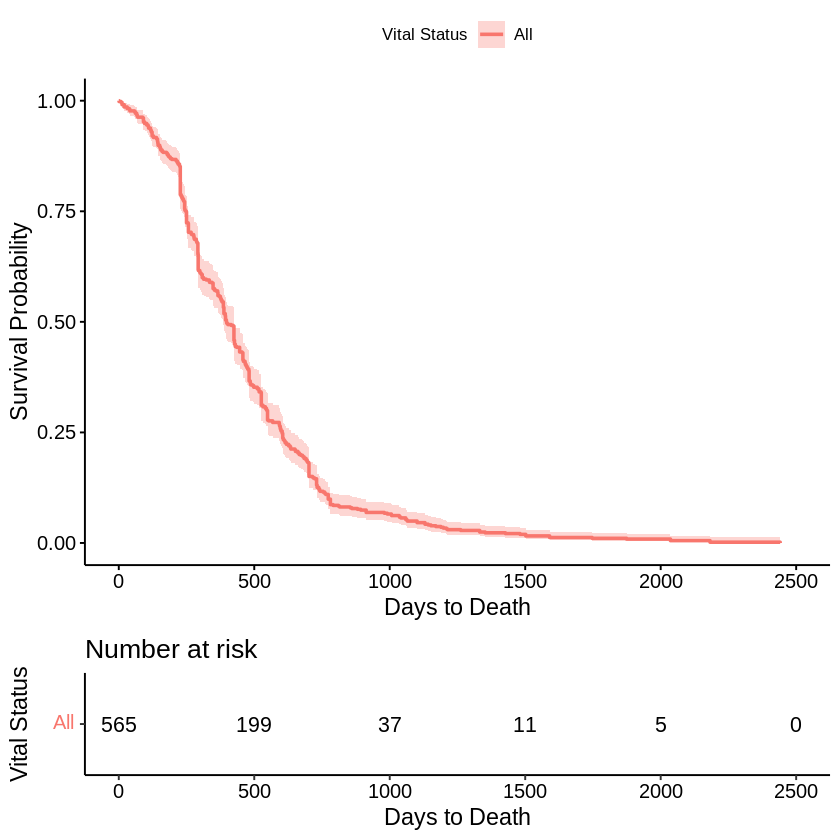

In [402]:
ggsurvplot(surv_object, data = data_cleaned, risk.table = TRUE,xlab = "Days to Death",ylab = "Survival Probability",legend.title = "Vital Status")

In [403]:
surv_object2 <- survfit(Surv(days_to_death, vital_status) ~ 0,data = data_cleaned)

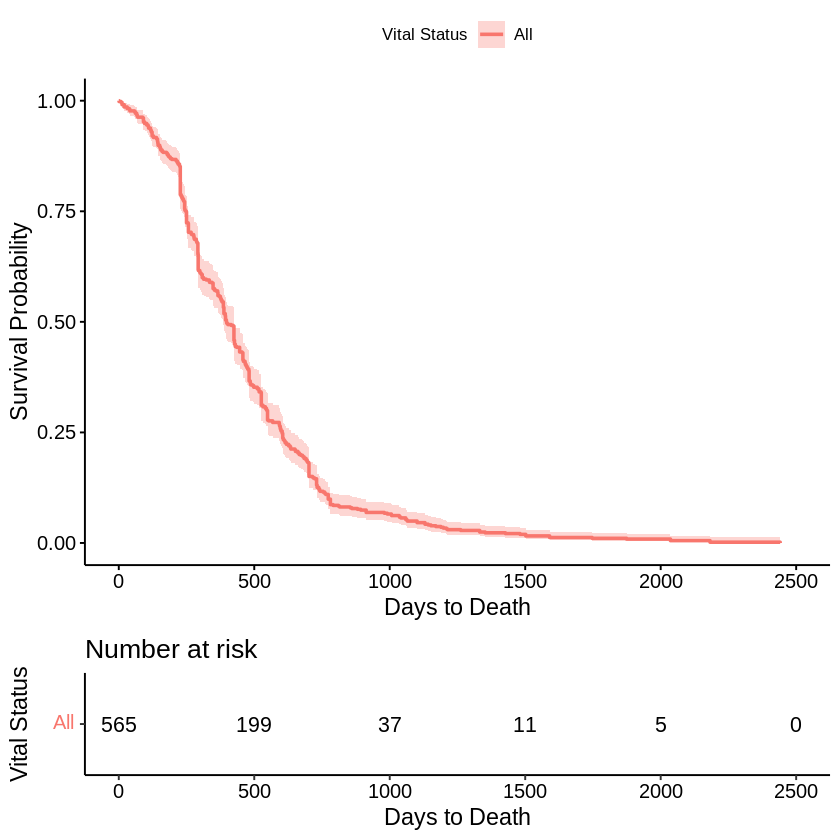

In [404]:
ggsurvplot(surv_object2, data = data_cleaned, risk.table = TRUE,xlab = "Days to Death",ylab = "Survival Probability",legend.title = "Vital Status")

In [405]:
data_cleaned %>%
  filter(vital_status == 1) %>%
  summarize(median_surv = median(days_to_death))

median_surv
<dbl>
398


In [410]:
surv_diff <- survdiff(Surv(days_to_death, vital_status)~race,data = data_cleaned)
surv_diff

Call:
survdiff(formula = Surv(days_to_death, vital_status) ~ race, 
    data = data_cleaned)

                                 N Observed Expected (O-E)^2/E (O-E)^2/V
race=asian                      38       38     59.2     7.586     9.003
race=black or african american  19       19     15.7     0.715     0.762
race=not reported               70       70     66.7     0.164     0.197
race=other                      33       33     49.4     5.468     6.399
race=Unknown                     6        6      8.5     0.735     0.773
race=white                     399      399    365.5     3.066     9.152

 Chisq= 19.2  on 5 degrees of freedom, p= 0.002 

p-value меньше 0.05 указывает на статистически значимые различия в выживаемости между различными расовыми группами.
Группы asian и other имеют значительное отклонение от ожидаемых значений, что указывает на особую выживаемость в этих группах по сравнению с другими.

In [412]:
surv_diff2 <- survdiff(Surv(days_to_death, vital_status)~cause_of_death,data = data_cleaned)
surv_diff2

Call:
survdiff(formula = Surv(days_to_death, vital_status) ~ cause_of_death, 
    data = data_cleaned)

n=364, 201 observations deleted due to missingness.

                                              N Observed Expected (O-E)^2/E
cause_of_death=Cancer Related               306      306 299.2953      0.15
cause_of_death=Cardiovascular Disorder, NOS   3        3   0.3395     20.85
cause_of_death=Infection                     13       13  20.5444      2.77
cause_of_death=Not Cancer Related             4        4   0.1667     88.12
cause_of_death=Not Reported                   2        2   0.1746     19.09
cause_of_death=Surgical Complications         3        3   0.0248    356.58
cause_of_death=Unknown                       33       33  43.4546      2.52
                                            (O-E)^2/V
cause_of_death=Cancer Related                   0.948
cause_of_death=Cardiovascular Disorder, NOS    21.788
cause_of_death=Infection                        3.215
cause_of_death=Not 

p-value <2e-16, что указывает на статистически значимые различия в выживаемости между группами существует и оно значительно.
Группы с причинами смерти, такими как "Cardiovascular Disorder, NOS", "Not Cancer Related" и "Surgical Complications", имеют наиболее значительные отклонения от ожидаемых значений, что указывает на их значительное влияние на выживаемость.

In [413]:
surv_diff3 <- survdiff(Surv(days_to_death, vital_status)~treatment_type,data = data_cleaned)
surv_diff3

Call:
survdiff(formula = Surv(days_to_death, vital_status) ~ treatment_type, 
    data = data_cleaned)

                                                             N Observed
treatment_type=Chemotherapy                                109      109
treatment_type=Immunotherapy (Including Vaccines)           22       22
treatment_type=None                                        156      156
treatment_type=Pharmaceutical Therapy, NOS                 103      103
treatment_type=Radiation Therapy, NOS                      124      124
treatment_type=Radiation, 2D Conventional                    1        1
treatment_type=Radiation, Intensity-Modulated Radiotherapy   1        1
treatment_type=Surgery, NOS                                 25       25
treatment_type=Targeted Molecular Therapy                   24       24
                                                           Expected (O-E)^2/E
treatment_type=Chemotherapy                                  86.477  5.87e+00
treatment_type=Immun

Химиотерапия имеет значения 7.36
Эти значения выше 3.84, что указывает на значительное отклонение между наблюдаемыми и ожидаемыми значениями, предполагая, что химиотерапия может существенно влиять на выживаемость.

In [416]:
surv_diff3 <- survdiff(Surv(days_to_death, vital_status)~gender,data = data_cleaned)
surv_diff3

Call:
survdiff(formula = Surv(days_to_death, vital_status) ~ gender, 
    data = data_cleaned)

           N Observed Expected (O-E)^2/E (O-E)^2/V
gender=0 292      292      264      3.04      5.98
gender=1 273      273      301      2.66      5.98

 Chisq= 6  on 1 degrees of freedom, p= 0.01 

Статистически значимые различия между мужчинами и женщинами указывают на то, что пол влияет на выживаемость пациентов. Женщины имеют большее количество случаев смерти, чем ожидалось, в то время как мужчины имеют меньшее количество случаев смерти, чем ожидалось.

In [419]:
cox_model <- coxph(Surv(days_to_death, vital_status)~gender +  treatment_type, data = data_cleaned)
summary(cox_model)

Call:
coxph(formula = Surv(days_to_death, vital_status) ~ gender + 
    treatment_type, data = data_cleaned)

  n= 565, number of events= 565 

                                                              coef exp(coef)
gender                                                    -0.21500   0.80654
treatment_typeImmunotherapy (Including Vaccines)          -0.19834   0.82009
treatment_typeNone                                        -0.53096   0.58804
treatment_typePharmaceutical Therapy, NOS                 -0.25836   0.77232
treatment_typeRadiation Therapy, NOS                      -0.26235   0.76924
treatment_typeRadiation, 2D Conventional                   0.25999   1.29691
treatment_typeRadiation, Intensity-Modulated Radiotherapy -0.12615   0.88149
treatment_typeSurgery, NOS                                -0.12460   0.88285
treatment_typeTargeted Molecular Therapy                  -0.23249   0.79255
                                                          se(coef)      z
gender      

gender Коэффициент -0.215 указывает на то, что вероятность смерти для мужчин ниже на 21.5% по сравнению с женщинами. Этот эффект является статистически значимым (p = 0.0121).
treatment_type Различные типы лечения также оказывают влияние на вероятность смерти. Например, тип лечения "None" (отсутствие лечения) имеет коэффициент -0.531, что указывает на более низкую вероятность смерти по сравнению с другими типами лечения. Этот эффект также статистически значим (p < 0.0001).
Важность результатов
Concordance Коэффициент конкордантности составляет 0.53, что указывает на среднюю способность модели предсказывать порядок смертности между парами пациентов.

In [421]:
cox_model <- coxph(Surv(days_to_death, vital_status)~gender +  treatment_or_therapy, data = data_cleaned)
summary(cox_model)

Call:
coxph(formula = Surv(days_to_death, vital_status) ~ gender + 
    treatment_or_therapy, data = data_cleaned)

  n= 565, number of events= 565 

                                     coef exp(coef) se(coef)      z Pr(>|z|)
gender                           -0.21821   0.80395  0.08505 -2.566   0.0103
treatment_or_therapynot reported -0.60407   0.54658  0.30050 -2.010   0.0444
treatment_or_therapyunknown      -0.56603   0.56777  0.11377 -4.975 6.51e-07
treatment_or_therapyyes          -0.20447   0.81508  0.09914 -2.063   0.0392
                                    
gender                           *  
treatment_or_therapynot reported *  
treatment_or_therapyunknown      ***
treatment_or_therapyyes          *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                 exp(coef) exp(-coef) lower .95 upper .95
gender                              0.8040      1.244    0.6805    0.9498
treatment_or_therapynot reported    0.5466      1.830    0.3033 